In [ ]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

In [ ]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [1]:
import pandas as pd

# Read the CSV and Perform Basic Data Cleaning

In [2]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


# Feature Selection

In [3]:
# Set features. This will also be used as your x values.
X = df.iloc[:, 1:]
X.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,-0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [4]:
y = df.iloc[:, 0]
print(X.shape, y.shape)

(6991, 40) (6991,)


<AxesSubplot:>

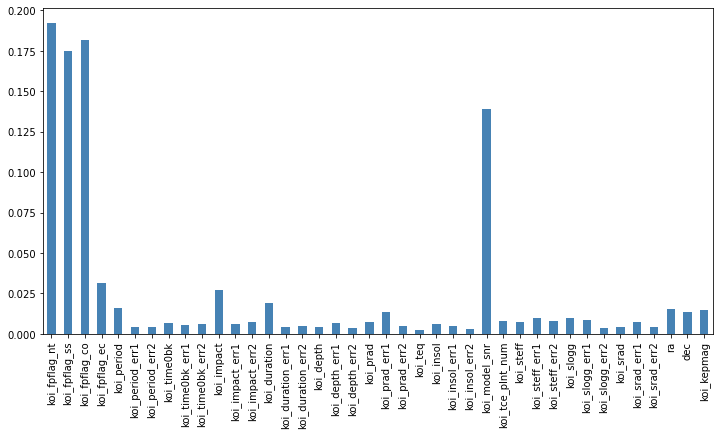

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel

clf = DecisionTreeClassifier()
trans = SelectFromModel(clf, threshold='median')
clf.fit(X, y)

pd.Series(clf.feature_importances_, index=df.columns[1:]).plot.bar(color='steelblue', figsize=(12, 6))

# Select your features (columns)

In [9]:


trans = SelectFromModel(clf, threshold='median')
kepler_X_trans = trans.fit_transform(X, y)

In [10]:
columns_retained_FromMode = df.iloc[:, 1:].columns[trans.get_support()].values

In [11]:
columns_retained_FromMode

array(['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec',
       'koi_period', 'koi_time0bk', 'koi_impact', 'koi_impact_err1',
       'koi_duration', 'koi_prad', 'koi_prad_err1', 'koi_model_snr',
       'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1',
       'koi_slogg_err1', 'koi_srad_err1', 'ra', 'dec', 'koi_kepmag'],
      dtype=object)

In [12]:
X = df[['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec',
       'koi_period', 'koi_time0bk', 'koi_impact', 'koi_impact_err1',
       'koi_duration', 'koi_prad', 'koi_prad_err1', 'koi_model_snr',
       'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1',
       'koi_slogg_err1', 'koi_srad_err1', 'ra', 'dec', 'koi_kepmag']]
X.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_impact_err1,koi_duration,koi_prad,koi_prad_err1,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_steff_err1,koi_slogg_err1,koi_srad_err1,ra,dec,koi_kepmag
0,0,0,0,0,54.418383,162.513840,0.586,0.059,4.50700,2.83,0.32,25.8,2,5455,81,0.064,0.105,291.93423,48.141651,15.347
1,0,1,0,0,19.899140,175.850252,0.969,5.126,1.78220,14.60,3.92,76.3,1,5853,158,0.044,0.233,297.00482,48.134129,15.436
2,0,1,0,0,1.736952,170.307565,1.276,0.115,2.40641,33.46,8.50,505.6,1,5805,157,0.053,0.201,285.53461,48.285210,15.597
3,0,0,0,0,2.525592,171.595550,0.701,0.235,1.65450,2.75,0.88,40.9,1,6031,169,0.070,0.334,288.75488,48.226200,15.509
4,0,0,0,0,4.134435,172.979370,0.762,0.139,3.14020,2.77,0.90,40.2,2,6046,189,0.054,0.315,296.28613,48.224670,15.714


# Create a Train Test Split

Use `koi_disposition` for the y values

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [14]:
X_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_impact_err1,koi_duration,koi_prad,koi_prad_err1,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_steff_err1,koi_slogg_err1,koi_srad_err1,ra,dec,koi_kepmag
3563,0,0,0,0,10.548413,139.064020,1.0170,0.0470,1.8720,3.89,0.65,11.7,2,6047,120,0.066,0.181,298.09543,44.737061,13.204
4099,0,0,0,0,24.754385,140.207320,0.7090,0.0230,3.3900,2.10,0.14,18.0,1,4852,144,0.078,0.056,295.73535,42.576248,15.514
5460,0,0,0,0,1.057336,131.792007,0.2620,0.2740,1.5795,14.59,1.15,476.0,1,4664,126,0.054,0.054,292.18417,49.310040,15.414
1091,0,0,0,0,201.118319,187.569860,0.0010,0.4170,10.3280,2.28,0.32,34.7,1,5646,101,0.072,0.135,283.11377,48.131390,13.328
5999,0,0,0,0,91.649983,175.715600,0.2136,0.2282,10.2940,2.27,1.27,8.7,2,6705,164,0.164,0.905,294.93198,39.812420,12.964


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [15]:
# Scale your data
import tensorflow
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [16]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression()

In [17]:
classifier.fit(X_train_scaled, y_train)

LogisticRegression()

In [18]:
print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

Training Data Score: 0.8228113675376693
Testing Data Score: 0.8403890160183066


In [20]:
predictions = classifier.predict(X_test_scaled)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   ['CANDIDATE' 'FALSE POSITIVE' 'FALSE POSITIVE' 'CONFIRMED'
 'FALSE POSITIVE' 'FALSE POSITIVE' 'FALSE POSITIVE' 'CONFIRMED'
 'CONFIRMED' 'FALSE POSITIVE']
First 10 Actual labels: ['CONFIRMED', 'FALSE POSITIVE', 'FALSE POSITIVE', 'CONFIRMED', 'FALSE POSITIVE', 'FALSE POSITIVE', 'FALSE POSITIVE', 'CONFIRMED', 'CANDIDATE', 'FALSE POSITIVE']


In [28]:
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

,Prediction,Actual
0,CANDIDATE,CONFIRMED
1,FALSE POSITIVE,FALSE POSITIVE
2,FALSE POSITIVE,FALSE POSITIVE
3,CONFIRMED,CONFIRMED
4,FALSE POSITIVE,FALSE POSITIVE
...,...,...
1743,FALSE POSITIVE,FALSE POSITIVE
1744,CONFIRMED,CONFIRMED
1745,FALSE POSITIVE,FALSE POSITIVE
1746,FALSE POSITIVE,FALSE POSITIVE


# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [21]:
# Create the GridSearchCV model
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
model = SVC(kernel='linear')

In [22]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [23]:
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END .................C=1, gamma=0.0001;, score=0.831 total time=   0.2s
[CV 2/5] END .................C=1, gamma=0.0001;, score=0.818 total time=   0.3s
[CV 3/5] END .................C=1, gamma=0.0001;, score=0.811 total time=   0.3s
[CV 4/5] END .................C=1, gamma=0.0001;, score=0.814 total time=   0.2s
[CV 5/5] END .................C=1, gamma=0.0001;, score=0.816 total time=   0.2s
[CV 1/5] END .................C=1, gamma=0.0005;, score=0.831 total time=   0.2s
[CV 2/5] END .................C=1, gamma=0.0005;, score=0.818 total time=   0.2s
[CV 3/5] END .................C=1, gamma=0.0005;, score=0.811 total time=   0.3s
[CV 4/5] END .................C=1, gamma=0.0005;, score=0.814 total time=   0.2s
[CV 5/5] END .................C=1, gamma=0.0005;, score=0.816 total time=   0.2s
[CV 1/5] END ..................C=1, gamma=0.001;, score=0.831 total time=   0.2s
[CV 2/5] END ..................C=1, gamma=0.001;

GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': [1, 5, 10, 50],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005]},
             verbose=3)

In [24]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 50, 'gamma': 0.0001}
0.8285328084180499


In [25]:
predictions = grid.predict(X_test_scaled)

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=["confirmed", "false positive", "candidate"]))

                precision    recall  f1-score   support

     confirmed       0.69      0.63      0.66       404
false positive       0.68      0.72      0.70       435
     candidate       0.99      1.00      0.99       909

      accuracy                           0.84      1748
     macro avg       0.79      0.78      0.78      1748
  weighted avg       0.84      0.84      0.84      1748



# Save the Model

In [27]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'Angel_Milla.sav'
joblib.dump(model, filename)

['Angel_Milla.sav']

ERROR! Session/line number was not unique in database. History logging moved to new session 715
